## Machine Learning

#### Fitting: 


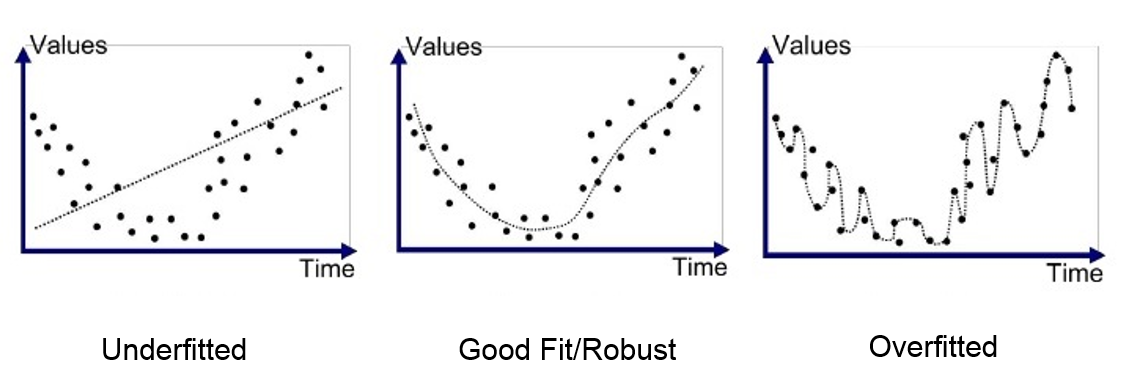

#### Error Types:
##### Regression:
1. Absolute Error: y_pred - y_actual
2. Mean Absolute Error: avg(y_pred - y_acutal)
3. Mean Square Error: sum(y_pred - y_actual)^2 / n
4. Root Mean Square Error: sqrt(sum(y_pred - y_actual)^2 / n)
5. Error Percentage = Avg.Error / Total Value

##### Classification:
1. Recall: TP / (TP + FN)
2. Precision: TP / (TP + FP)
3. Accuracy: (TP + TN) / (TP + TN + FP + FN)
4. F1 score [harmonic mean]: (Recall + Precision) / (Recall * Precision)

##### Confusion Matrix:
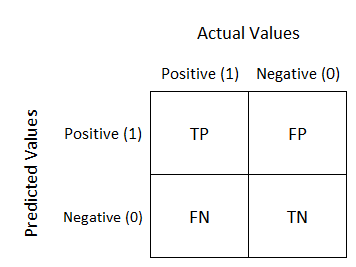

#### ALGORITHMS

1. Linear Rrgression  {R}
2. Logistic Regression {C}
3. SVM {C}
4. K-means {Cl}
5. KNN {Cl}
6. Hierachial clustering {Cl}
7. Ada Boost {Ensemble method}
8. Random forest {Ensemble method}
9. Naive Bayes {R+C}
10. Decision tree {R+C}
11. Eclat {Associate Learning}
12. Apriori {Associate Learning}
13. LDA {Topic modeling}
14. TF-IDF {Topic modeling}
15. PCA {Dimensionality Rreduction}

#### Steps for implementation:
1. Load Dataset
2. Split Dataset {80/20}
3. Vectorization or Normalization
4. Define a model
5. Training {80% of the data}
6. Validation
7. Tuning
8. Testing or cross validation {20% of the data}

#### Linear Regression

y = mx + c 

{where, 
m - Slope
c - y-intercept}
 
m = sum {( x-x' )( y-y' )} / sum{( x-x' )^2}    
(or)    
(m_x * m_y) - m(x * y) / (m_x) ^ 2 - m (x^2)

c = y - mx

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statistics import mean

x = np.array([1,2,3,4,5,6], dtype = np.float64)
y = np.array([3,5,8,10,8,12], dtype = np.float64)

m = (((mean(x)*mean(y)) - mean(x*y)) /  #----------------> Slope
         ((mean(x)**2) - mean(x**2)))

c = mean(y) - m*mean(x) #---------------------------------> y-intercept

print("y-intercept: ", c)
print("Slope: ", m)

#regression_line = [(m*i) + c for i in x]
regression_line = []
for i in x:
    regression_line.append((m*i) + c)

print(regression_line)
    
pred_x = 10
pred_y = (m*pred_x) + c
print("Predicted output: ", pred_y)

mean_y = mean(y)
prd_values = 0
actual_values = 0
for i in range (len(x)):
    prd_values += (y[i] - regression_line[i]) ** 2
    actual_values += (y[i] - mean_y) ** 2
    
mean_squared_error = (prd_values/actual_values)
rmse = np.sqrt(mean_squared_error)
accuracy = 1 - rmse

print("Mean Squared Error: ", mean_squared_error)
print("RMSE: ", rmse)
print("Accuracy: ", accuracy)

plt.scatter(x,y)
plt.scatter(pred_x, pred_y, color='g')
plt.plot(x,regression_line)
plt.show()

y-intercept:  2.066666666666669
Slope:  1.5999999999999994
[3.6666666666666687, 5.2666666666666675, 6.866666666666667, 8.466666666666667, 10.066666666666666, 11.666666666666664]
Predicted output:  18.066666666666663
Mean Squared Error:  0.1600000000000001
RMSE:  0.40000000000000013
Accuracy:  0.5999999999999999


<Figure size 640x480 with 1 Axes>

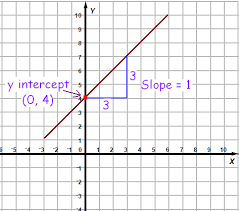

In [3]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

dataset = pd.read_csv("/home/sudhakar/JPA_ML/housing_train.csv")


X = np.array(dataset[["LotArea", "OverallCond", "YearRemodAdd", 
            "GrLivArea", "BsmtFullBath", "KitchenAbvGr", "YrSold"]])

y = np.array(dataset[["SalePrice"]])

x_train, x_test, y_train, y_test = train_test_split(X,y,random_state = 4,train_size = 0.8)
model = LinearRegression()

model.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
history = model.predict(x_test)
history

array([[219645.23799883],
       [226696.8243028 ],
       [195487.27080935],
       [151715.55542964],
       [112990.56266093],
       [173386.5869056 ],
       [194820.90112592],
       [263655.51726558],
       [229745.88460415],
       [212266.07422279],
       [159689.62267551],
       [196700.40699062],
       [147608.63729911],
       [102863.04112994],
       [127322.50889075],
       [242081.20560832],
       [104667.50093958],
       [182514.8024512 ],
       [232325.5210579 ],
       [136995.47799447],
       [305263.24171309],
       [184990.35300396],
       [236752.3995548 ],
       [285377.62100605],
       [210882.98784016],
       [197848.41843618],
       [198155.67022579],
       [332435.24745963],
       [ 96252.35305089],
       [ 76055.79913007],
       [222011.69264521],
       [126387.5078237 ],
       [253541.25760252],
       [236413.40577315],
       [ 83562.77574989],
       [117351.82291448],
       [180006.45964525],
       [238484.38662587],
       [2937

In [5]:
count = []
for i in range(x_train):
    count.append(i)
    


TypeError: only integer scalar arrays can be converted to a scalar index

In [6]:
mse = mean_squared_error(y_test, history)
rmse = np.sqrt(mse)
print(rmse/len(X))

27.323120859797164


https://github.com/sharmasaravanan/Machine_learning

#### Logistic Regression 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.feature_extraction.text import CountVectorizer

from bs4 import BeautifulSoup #html remover
import re #pattern matching
from nltk.corpus import stopwords # to remove stopwords

##### Fetching the dataset:

In [5]:
train_dataset = pd.read_csv("/home/sudhakar/Documents/Dataset/imdb_reviews.csv", encoding='latin-1')
print(set(train_dataset.Sentiment.values))
text_list = train_dataset.SentimentText.values

{0, 1}


##### Cleaning the input data:

In [6]:
def cleaning(data):
    stop = stopwords.words("english")
    html_free = BeautifulSoup(data, 'html.parser').get_text()
    special_char_free = re.sub("[^a-zA-Z]", " ", html_free)
    lower_case = special_char_free.lower()
    words = lower_case.split()
    cleaned_str = [w for w in words if w not in stop]
    return " ".join(cleaned_str)

##### Input and Output:

In [7]:
#X = list(map(cleaning, train_dataset.SentimentText))
X = []
for data in text_list:
    X.append(cleaning(data))
y = np.array(train_dataset.Sentiment)

##### Splitting train and test data:

In [8]:
X_train, X_test, y_train, y_tset = train_test_split(X, y, test_size=0.3, random_state=3)


##### Vectorizing the input data:

In [ ]:
vectx = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)
vect_x_train = vectx.transform(X_train)

##### Defining and fitting the model:

In [9]:
model = LogisticRegression()
model.fit(vect_x_train, y_train)

/home/sudhakar/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

##### Predicting the output:

In [10]:
history = model.predict(vectx.transform(X_test))
for i in range(len(y_tset)):
    print("Actual: {0} and Predicted: {1}".format(y_tset[i], history[i]))

Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
A

Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
A

Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 0
Actual: 0 and Predicted: 0
A

Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 1
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
Actual: 0 and Predicted: 0
Actual: 1 and Predicted: 1
Actual: 0 and Predicted: 0
A

##### Accuracy score:

In [11]:
accuracy = accuracy_score(y_true=y_tset, y_pred=history)
print("Accuracy is: ", accuracy)

Accuracy is:  0.8789333333333333


##### Classification Report:

In [12]:
print("Classification Report: \n", classification_report(y_true=y_tset, y_pred=history))

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      3749
           1       0.87      0.89      0.88      3751

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500



##### Real-time testing:

In [16]:
#Real time testing:
test_data = "<p> Very glad to see that this excellent <br> film gets such high marks from the users of IMDB!!!. The Best Years of Their Lives remains the finest cinematic statement about veterans returning from war that I have come across. Easily the <b> finest performance <b> by the often overlooked Frederick March. In fact the entire cast shines, including music legend Hoagy Carmichael who treats us all with a subtle version of his classic Lazy River. I would recommend this excellent film to anyone who loves movies."
test_data

'<p> Very glad to see that this excellent <br> film gets such high marks from the users of IMDB!!!. The Best Years of Their Lives remains the finest cinematic statement about veterans returning from war that I have come across. Easily the <b> finest performance <b> by the often overlooked Frederick March. In fact the entire cast shines, including music legend Hoagy Carmichael who treats us all with a subtle version of his classic Lazy River. I would recommend this excellent film to anyone who loves movies.'

In [14]:
cleaned_test_data = cleaning(test_data)
vect_data = vectx.transform([cleaned_test_data])

In [15]:
print("The review is: ", model.predict(vect_data))
print("The probability score: ", model.predict_proba(vect_data))

The review is:  [1]
The probability score:  [[5.08973168e-05 9.99949103e-01]]


#### SVM

In [17]:
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
dataset = fetch_lfw_people(min_faces_per_person=100)
print(dataset.images)

In [89]:
X = dataset.data
y = dataset.target
print(X)
print(y)
target_names = dataset.target_names
print(target_names)

[[ 34.        29.333334  22.333334 ...  14.666667  16.        14.      ]
 [158.       160.66667  169.66667  ... 138.66667  135.66667  130.33333 ]
 [ 76.666664  81.        87.666664 ... 191.66667  145.33333   66.      ]
 ...
 [ 38.333332  41.666668  55.       ...  66.        63.333332  54.666668]
 [ 16.666666  24.333334  60.333332 ... 219.       144.        69.      ]
 [ 58.333332  48.        20.       ... 116.       105.666664 143.66667 ]]
[5360 3434 3807 ... 2175  373 2941]
['AJ Cook' 'AJ Lamas' 'Aaron Eckhart' ... 'Zumrati Juma' 'Zurab Tsereteli'
 'Zydrunas Ilgauskas']


In [90]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state = 3)
xtrain.shape

(9924, 2914)

In [ ]:
svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(xtrain,ytrain)

In [26]:
pred = svc_model.predict(xtest)
for i in range(len(ytest)):
    print("Actual: {0} Predicted: {1}".format(ytest[i], pred[i] ))

Actual: 2 Predicted: 2
Actual: 2 Predicted: 2
Actual: 2 Predicted: 2
Actual: 2 Predicted: 2
Actual: 0 Predicted: 0
Actual: 2 Predicted: 2
Actual: 4 Predicted: 4
Actual: 2 Predicted: 4
Actual: 2 Predicted: 2
Actual: 2 Predicted: 2
Actual: 0 Predicted: 0
Actual: 1 Predicted: 0
Actual: 2 Predicted: 2
Actual: 2 Predicted: 2
Actual: 1 Predicted: 1
Actual: 4 Predicted: 3
Actual: 1 Predicted: 2
Actual: 0 Predicted: 0
Actual: 0 Predicted: 0
Actual: 4 Predicted: 4
Actual: 2 Predicted: 2
Actual: 2 Predicted: 2
Actual: 1 Predicted: 2
Actual: 2 Predicted: 2
Actual: 2 Predicted: 2
Actual: 0 Predicted: 0
Actual: 3 Predicted: 3
Actual: 3 Predicted: 3
Actual: 0 Predicted: 0
Actual: 1 Predicted: 1
Actual: 0 Predicted: 2
Actual: 2 Predicted: 2
Actual: 2 Predicted: 2
Actual: 2 Predicted: 2
Actual: 3 Predicted: 3
Actual: 2 Predicted: 2
Actual: 0 Predicted: 0
Actual: 2 Predicted: 2
Actual: 2 Predicted: 2
Actual: 2 Predicted: 2
Actual: 4 Predicted: 4
Actual: 2 Predicted: 2
Actual: 2 Predicted: 2
Actual: 4 P

In [ ]:
accuracy = accuracy_score(y_true=ytest, y_pred=pred)
report = classification_report(y_true=ytest, y_pred=pred, target_names=target_names)

print("Accuracy is:", accuracy)
print("Classification Report: \n", report)

##### Real-time testing:

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
image = cv2.imread("1200px-Colin_Powell_official_Secretary_of_State_photo.jpg")
# print(image)
# plt.imshow(image)
# plt.show()
resize_image = np.resize(image, (47,62))
array_image = np.reshape(resize_image, (1,-1))
array_image.shape

In [ ]:
op = svc_model.predict(array_image)
prob_op = svc_model.predict_proba(array_image)
print(op)
prob_op

In [81]:
target_names

array(['Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], dtype='<U17')

#### K-Means

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from collections import Counter

In [8]:
X = np.array([[1, 2],
              [5, 8],
              [1.5, 1.8],
              [8, 8],
              [1, 0.6],
              [9, 11]])

k_means_model = KMeans(n_clusters=3)
k_means_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
centeroids = k_means_model.cluster_centers_
labels = k_means_model.labels_

In [10]:
centeroids

array([[ 1.16666667,  1.46666667],
       [ 6.5       ,  8.        ],
       [ 9.        , 11.        ]])

In [11]:
labels

array([0, 1, 0, 1, 0, 2], dtype=int32)

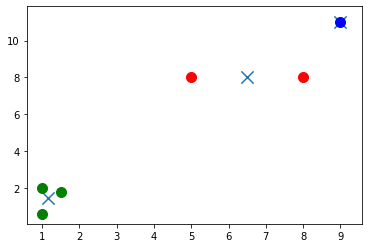

In [16]:
color = ['g.', 'r.', 'b.']
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], color[labels[i]], markersize = 20)
plt.scatter(centeroids[:,0], centeroids[:,1], marker='x', s= 150)
plt.show()